In [2]:
import sparql_dataframe
import matplotlib.pyplot as plt
import pandas as pd

endpoint_url = "https://orkg.org/triplestore"

PREFIX = """
        PREFIX orkgr: <http://orkg.org/orkg/resource/>
        PREFIX orkgc: <http://orkg.org/orkg/class/>
        PREFIX orkgp: <http://orkg.org/orkg/predicate/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        """

Table 2 Extent of empirical studies

Welche emprischen Forschungsmethoden verwenden Forscher im Bereich des RE?

<AxesSubplot:ylabel='collection method'>

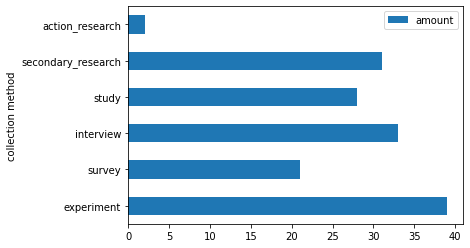

In [3]:
query = """
        SELECT ?year, ?experiment, ?survey, ?interview, ?study, ?secondary_research, ?action_research
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              ?paper orkgp:P29 ?year.
              ?contribution rdfs:label ?contribution_name.
              ?contribution orkgp:P56008 ?data_collection_method.
              OPTIONAL{?data_collection_method orkgp:P1007/rdfs:label ?experiment}
              OPTIONAL{?data_collection_method orkgp:P57036/rdfs:label ?survey}
              OPTIONAL{?data_collection_method orkgp:P57034/rdfs:label ?interview.}
              OPTIONAL{?data_collection_method orkgp:P57040/rdfs:label ?study.}
              OPTIONAL{?data_collection_method orkgp:P57021/rdfs:label ?secondary_research.}
              OPTIONAL{?data_collection_method orkgp:P57020/rdfs:label ?action_research.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
#get oldest year
start_year = data.sort_values(by=['year'])['year'].iloc[0]
cm = []
values = []
for col in range(1, len(data.columns)):
        cm.append(data.columns[col])
        values.append(data[data.columns[col]].value_counts().sum())
pd.DataFrame(data={'collection method': cm, 'amount':values}).plot(kind='barh', x='collection method', y='amount')

Beschreibung

Wie hat sich die Verwendung der Methoden in den letzten Jahren geändert?

<AxesSubplot:title={'center':'Change of method usage since 2015'}, xlabel='year'>

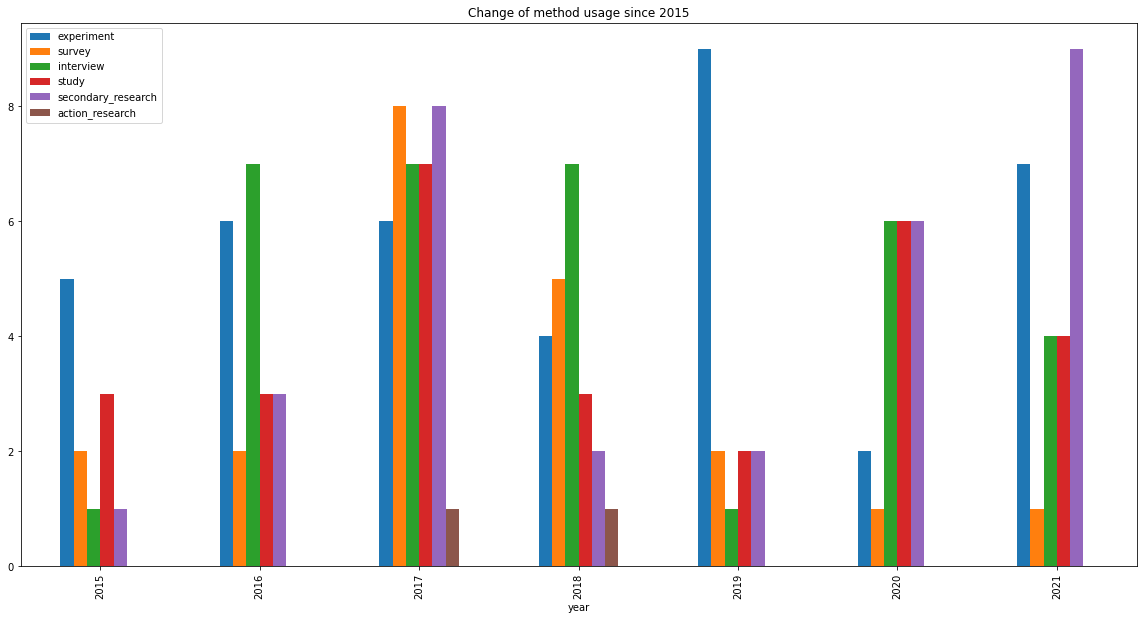

In [4]:
data.groupby(['year']).count().plot(kind='bar', figsize=(20,10), title='Change of method usage since {year}'.format(year=start_year))

Beschreibung

Table 3 Quality of empirical studies

Wie hoch ist der Anteil bei der Verwendung von surveys, case studies und action research im RE?

<AxesSubplot:ylabel='research methods'>

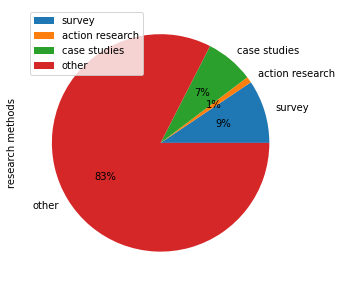

In [5]:
query = """
        SELECT ?year, ?surveys, ?action_research, ?case_studies
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?contribution orkgp:P56008 ?collection.
              ?paper orkgp:P29 ?year.
              OPTIONAL{?collection orkgp:P57036 ?surveys.}
              OPTIONAL{?collection orkgp:P57020 ?action_research.}
              OPTIONAL{?collection orkgp:P57040/rdfs:label ?case_studies.
                FILTER regex(?case_studies, "case study", "i")}
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_of_survey = data['surveys'].value_counts().sum()
number_of_action_research = data['action_research'].value_counts().sum()
number_of_case_studies = data['case_studies'].value_counts().sum()

method_data = pd.DataFrame({'research methods':[number_of_survey, number_of_action_research, number_of_case_studies, len(data)]}, index=['survey', 'action research', 'case studies', 'other'])
method_data.plot(kind='pie',  y='research methods', autopct='%1.0f%%', figsize=(5,5))


Beschreibung

Wie hat sich die Nutzung dieser drei Methoden( survey, case studies und action research)  in den vergangenen Jahren  entwickelt?

<AxesSubplot:xlabel='year'>

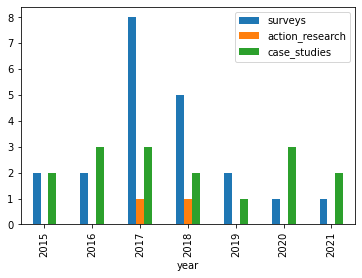

In [6]:
data.groupby('year').count().plot(kind='bar')

Beschreibung

Welche statistischen Methoden werden in der Forschung im RE verwendet?

In [7]:
from numpy import maximum


query = """
        SELECT ?contribution, ?maximum, ?mean, ?median, ?minimum, ?mode, ?range, ?variance, ?skewness, ?kurtosis, ?standard_deviation, ?count, ?percent, ?inferential
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper orkgp:P29 ?year.
              ?contribution orkgp:P15124 ?analysis.
              OPTIONAL{?analysis orkgp:P56048 ?descriptive.
                OPTIONAL{?descriptive orkgp:P57005 ?tendency.
                    ?tendency orkgp:P44108 ?maximum.
                    ?tendency orkgp:P47000 ?mean.
                    ?tendency orkgp:P57006 ?median.
                    ?tendency orkgp:P44107 ?minimum.
                    ?tendency orkgp:P57007 ?mode.}
                OPTIONAL{?descriptive orkgp:P57008 ?dispersion.
                    ?dispersion orkgp:P4013  ?range.
                    ?dispersion orkgp:P44087 ?standard_deviation.
                    ?dispersion orkgp:P57009 ?variance.
                    ?dispersion orkgp:P59063 ?skewness.
                    ?dispersion orkgp:P59064 ?kurtosis.}
                OPTIONAL{?descriptive orkgp:P56049 ?frequency.
                    ?frequency orkgp:P55023 ?count.
                    ?frequency orkgp:P56050 ?percent.}
                }
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56044/rdfs:label ?inferential.}
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data

,contribution,maximum,mean,median,minimum,mode,range,variance,skewness,kurtosis,standard_deviation,count,percent,inferential
0,http://orkg.org/orkg/resource/R193091,False,True,True,False,False,False,False,False,False,True,True,True,NaN
1,http://orkg.org/orkg/resource/R195498,False,True,False,False,False,False,True,False,False,True,True,True,NaN
2,http://orkg.org/orkg/resource/R200107,False,True,True,False,False,False,False,False,False,True,False,True,NaN
3,http://orkg.org/orkg/resource/R199125,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,True,False,NaN
4,http://orkg.org/orkg/resource/R193420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,chi-squared test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,http://orkg.org/orkg/resource/R199159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,http://orkg.org/orkg/resource/R199163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,http://orkg.org/orkg/resource/R199165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,http://orkg.org/orkg/resource/R200046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Beschreibung

Wie hat sich die Nutzung dieser Methoden in den letzten Jahren geändert?

Beschreibung

Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffentlicht?

<Figure size 432x288 with 0 Axes>

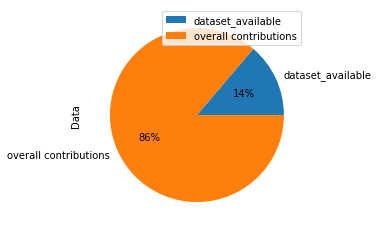

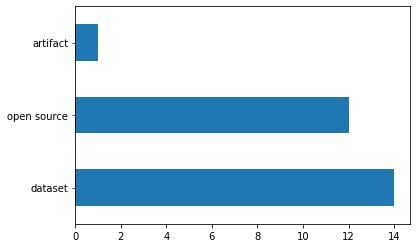

In [8]:
query = """
        SELECT ?contribution, ?data
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              OPTIONAL{?contribution orkgp:P56008/orkgp:DATA/orkgp:P17001/rdfs:label ?data.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
available_data = data['data'].value_counts().sum()
test = pd.DataFrame({'Data':[available_data, len(data)]}, index=['dataset_available', 'overall contributions'])
plt.figure()
test.plot(kind='pie', y='Data', autopct='%1.0f%%') 
plt.figure()               
data['data'].value_counts().plot(kind='barh')
plt.show()

Beschreibung

Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt?

<AxesSubplot:ylabel='highlighted'>

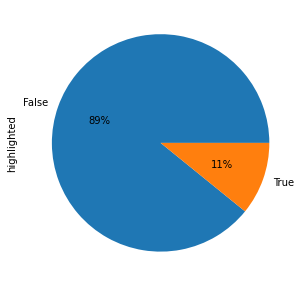

In [9]:
query = """
        SELECT ?contribution, ?highlighted, ?hidden
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P57004 ?research_question_answer.
                OPTIONAL{?research_question_answer orkgp:P55039 ?highlighted.
                         ?research_question_answer orkgp:P55038 ?hidden.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data['highlighted'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))

Anhand dieses Diagramms ist erkennbar, dass nur 11% der aktuell im ORKG beschriebenen Contributions im Bereich des RE eine Antwort auf eine Forschungsfrage explizit im Text geben.

Wie hoch ist der Anteil von systematischen Studien(SLR, mapping study...)?

Beschreibung

Verwenden Forschungen mehr als eine Forschungsmethode?

<AxesSubplot:>

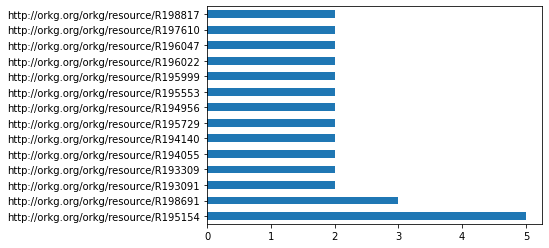

In [10]:
query = """
        SELECT ?contribution, ?collection
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/rdfs:label ?collection.
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data = data[data['collection'] != 'collection']
combined = data[data.duplicated(['contribution'], keep=False)]
combined['contribution'].value_counts().plot(kind='barh')

Beschreibung

Welche Methoden werden Kombiniert?

Beschreibung

Welche Kombinationen aus data collection methods und analysis methods werden verwendet?

<AxesSubplot:title={'center':'Analysis method in combination with experiment'}, ylabel='usage'>

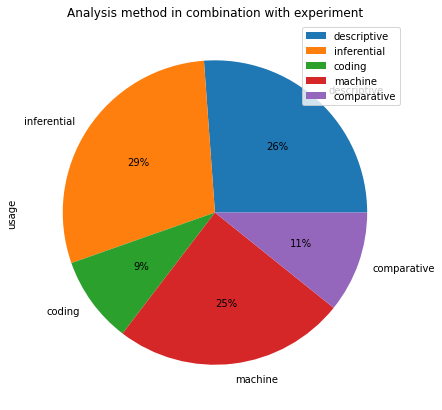

In [47]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P1007 ?experiment.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with experiment")

<AxesSubplot:title={'center':'Analysis method in combination with Surveys'}, ylabel='usage'>

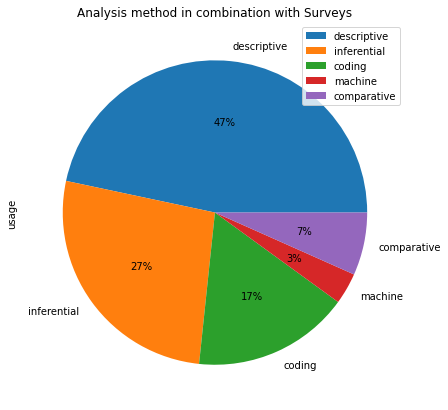

In [48]:
query = """
        SELECT ?exp, ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57036 ?experiment.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with Surveys")

<AxesSubplot:title={'center':'Analysis method in combination with Surveys'}, ylabel='usage'>

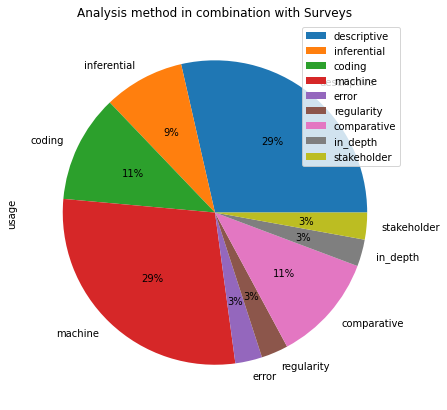

In [13]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57040 ?surveys.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with Surveys")

<AxesSubplot:title={'center':'Analysis method in combination with Surveys'}, ylabel='usage'>

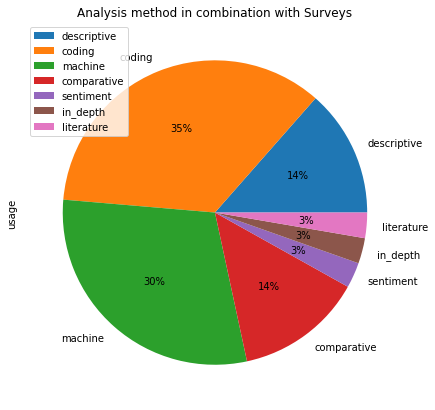

In [14]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57021 ?secondary_research.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with Secondary Research")

Beschreibung

,exp,descriptive,inferential,coding,machine,error,reg,regularity,comparative,sentiment,in_depth,behavioural,stakeholder,literature,artefact
0,NaN,http://orkg.org/orkg/resource/R198859,http://orkg.org/orkg/resource/R198860,http://orkg.org/orkg/resource/R195136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,http://orkg.org/orkg/resource/R193438,http://orkg.org/orkg/resource/R193437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,http://orkg.org/orkg/resource/R194965,http://orkg.org/orkg/resource/R194570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,http://orkg.org/orkg/resource/R195152,NaN,NaN,NaN,NaN,NaN,NaN,http://orkg.org/orkg/resource/R194083,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,http://orkg.org/orkg/resource/R193897,NaN,NaN,NaN,NaN,NaN,NaN,http://orkg.org/orkg/resource/R194083,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,http://orkg.org/orkg/resource/R195136,NaN,NaN,NaN,NaN,http://orkg.org/orkg/resource/R193812,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://orkg.org/orkg/resource/R193812,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://orkg.org/orkg/resource/R193812,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,http://orkg.org/orkg/resource/R195152,http://orkg.org/orkg/resource/R196078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,http://orkg.org/orkg/resource/R193394,NaN,NaN,http://orkg.org/orkg/resource/R193397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


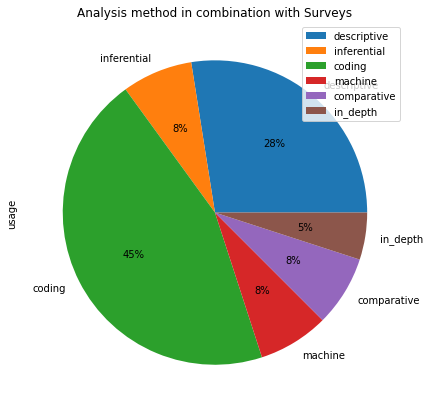

In [15]:
query = """
        SELECT ?exp, ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57034 ?experiment.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with Surveys") 
data